## Student Performance Indicator

### Lifecycle of a project

##### 1. Understanding the problem statement
##### 2. Data Collection
##### 3. Data Checks to perform
##### 4. Exploratory data analysis
##### 5. Data Pre-Processing
##### 6. Model Training
##### 7. Choose best model

### 1) Problem statement
##### This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2) Data Collection
#### Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
#### The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#### Import the CSV data as Pandas data frame.

In [4]:
df = pd.read_csv(r'C:\Users\sudhr\Downloads\new_project\Notebooks\data\stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [5]:
df.shape

(1000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [11]:
numerical_col = df.select_dtypes(include=['int64']).columns.to_list()
categorical_col = df.select_dtypes(include=['object']).columns.to_list()
for x in categorical_col:
    print(df[x].value_counts())

gender
female    518
male      482
Name: count, dtype: int64
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
test_preparation_course
none         642
completed    358
Name: count, dtype: int64


In [48]:
data = {
    'gender': {'female': 518, 'male': 482},
    'race_ethnicity': {'group C': 319, 'group D': 262, 'group B': 190, 'group E': 140, 'group A': 89},
    'parental_level_of_education': {
        'some college': 226,
        "associate's degree": 222,
        'high school': 196,
        'some high school': 179,
        "bachelor's degree": 118,
        "master's degree": 59,
    },
    'lunch': {'standard': 645, 'free/reduced': 355},
    'test_preparation_course': {'none': 642, 'completed': 358},
}

df_list = []

for category, counts in data.items():
    temp_df = pd.DataFrame(list(counts.items()),columns=['Category','Count'])
    temp_df['Column'] = category
    df_list.append(temp_df)

final_df = pd.concat(df_list, ignore_index=True)

final_df = final_df[['Column','Category','Count']] 

print(final_df)

                         Column            Category  Count
0                        gender              female    518
1                        gender                male    482
2                race_ethnicity             group C    319
3                race_ethnicity             group D    262
4                race_ethnicity             group B    190
5                race_ethnicity             group E    140
6                race_ethnicity             group A     89
7   parental_level_of_education        some college    226
8   parental_level_of_education  associate's degree    222
9   parental_level_of_education         high school    196
10  parental_level_of_education    some high school    179
11  parental_level_of_education   bachelor's degree    118
12  parental_level_of_education     master's degree     59
13                        lunch            standard    645
14                        lunch        free/reduced    355
15      test_preparation_course                none    6

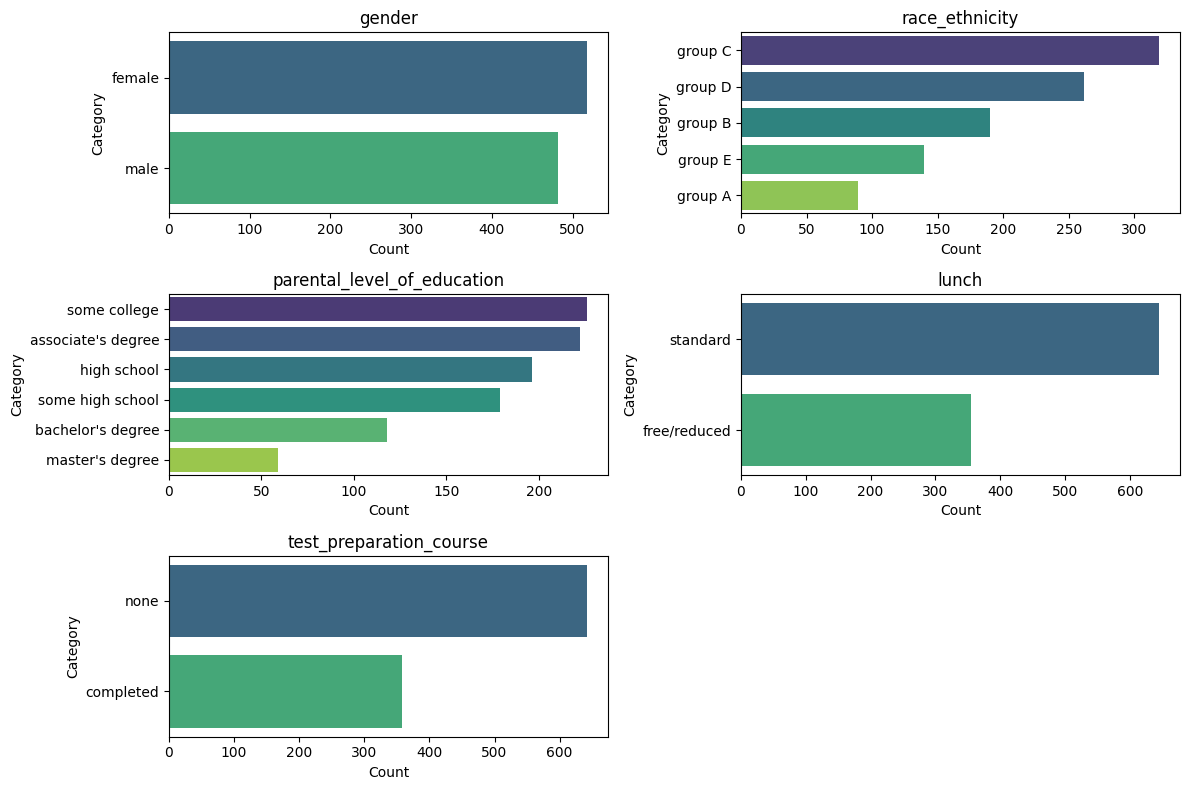

In [51]:
plt.figure(figsize=(12,8))
for i, column in enumerate(final_df['Column'].unique()):
    plt.subplot(3, 2, i + 1)  # Adjust rows and cols for your data
    sub_df = final_df[final_df['Column'] == column]
    sns.barplot(data=sub_df, x='Count', y='Category', palette='viridis')
    plt.title(column)
    plt.xlabel("Count")
    plt.ylabel("Category")
    plt.tight_layout()  # Adjust layout to prevent overlapping

# Show the plots
plt.show()

In [52]:
# Duplicate checks
df.duplicated().sum()

np.int64(0)

In [53]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [56]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


###### From the above data, the means are closer to each other
###### All standard deviations are also close
###### The minimum score for math is 0, but much higher for other subjects.

#### Adding columns "Total Score" and Average

In [66]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [67]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f"No. of students with a 100 in reading {reading_full}")
print(f"No. of students with a 100 in reading {writing_full}")
print(f"No. of students with a 100 in reading {math_full}")

No. of students with a 100 in reading 17
No. of students with a 100 in reading 14
No. of students with a 100 in reading 7


In [ ]:
# Students who have scored centum in a particular subject
# Define a dictionary to map subjects to their respective columns
subjects = {
    "reading": "reading_score",
    "writing": "writing_score",
    "math": "math_score"
}

# Count the number of students with a 100 in each subject
full_scores = {subject: df[df[column] == 100]['average'].count() for subject, column in subjects.items()}

# Print the results
for subject, count in full_scores.items():
    print(f"No. of students with a 100 in {subject}: {count}")


No. of students with a 100 in reading: 17
No. of students with a 100 in writing: 14
No. of students with a 100 in math: 7


In [69]:
# Count the number of students who have scored less than or equal to 20
less_than_20 = {subject: df[df[column]<=20]['average'].count() for subject, column in subjects.items()}
for sub, count in less_than_20.items():
    print(f"No. of students with a 20 or lesser in {sub}: {count}")

No. of students with a 20 or lesser in reading: 1
No. of students with a 20 or lesser in writing: 3
No. of students with a 20 or lesser in math: 4


In [ ]:
# Students who have scored a 100 in all the three subjects.
df[df['average']==100]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.0
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.0
962,female,group E,associate's degree,standard,none,100,100,100,300,100.0


In [77]:
features = ['reading_score','writing_score','math_score']
percentile_counts = {}
for feature in features:
    q0 = df[feature].min()
    q25 = df[feature].quantile(0.25)
    q50 = df[feature].quantile(0.5)
    q75 = df[feature].quantile(0.75)
    q100 = df[feature].max()
    counts =   {
        'min': df[df[feature]==q0].shape[0],
        'min - 25%': df[(df[feature]>q0)&(df[feature]<q25)].shape[0],
        'at_25': df[df[feature]==q25].shape[0],
        '25% - 50%': df[(df[feature]>q25)&(df[feature]<q50)].shape[0],
        'at_50': df[df[feature]==q50].shape[0],
        '50% - 75%': df[(df[feature]>q50)&(df[feature]<q75)].shape[0],
        'at_75': df[df[feature]==q75].shape[0],
        '75% - 100%': df[(df[feature]>q75)&(df[feature]<q100)].shape[0],
        'at_100': df[df[feature]==q100].shape[0]
        
    }    
    percentile_counts[feature]=counts

result_df = pd.DataFrame(percentile_counts)
result_df   

,reading_score,writing_score,math_score
min,1,1,1
min - 25%,236,249,247
at_25,17,0,18
25% - 50%,233,238,217
at_50,26,23,24
50% - 75%,219,235,240
at_75,19,19,24
75% - 100%,232,221,222
at_100,17,14,7


#### A histogram-kde plot

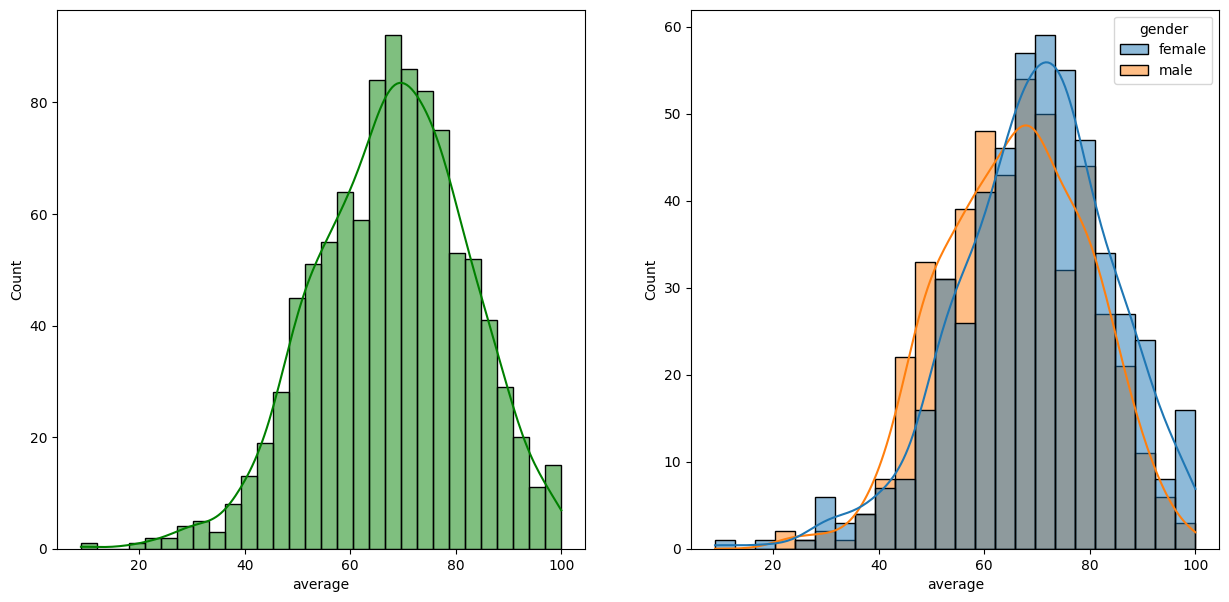

In [83]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

In [89]:
pivot_table = pd.pivot_table(
    df,
    index='gender',
    values='average',
    aggfunc='mean',  # Counts occurrences
    fill_value=0     # Fill missing values with 0
)
pivot_table


,average
gender,
female,69.569498
male,65.837483


#### women perform better than men, based on the mean of the average feature

In [90]:
pivot_table_a = pd.pivot_table(
    df,
    index='lunch',
    columns='gender',
    values='average',
    aggfunc='mean',  # Counts occurrences
    fill_value=0     # Fill missing values with 0
)
pivot_table_a

gender,female,male
lunch,,
free/reduced,63.215168,61.042169
standard,73.219858,68.356540


#### Standard lunch helps students better, be it boys or girls. Girls seem to perform better in both the cases.

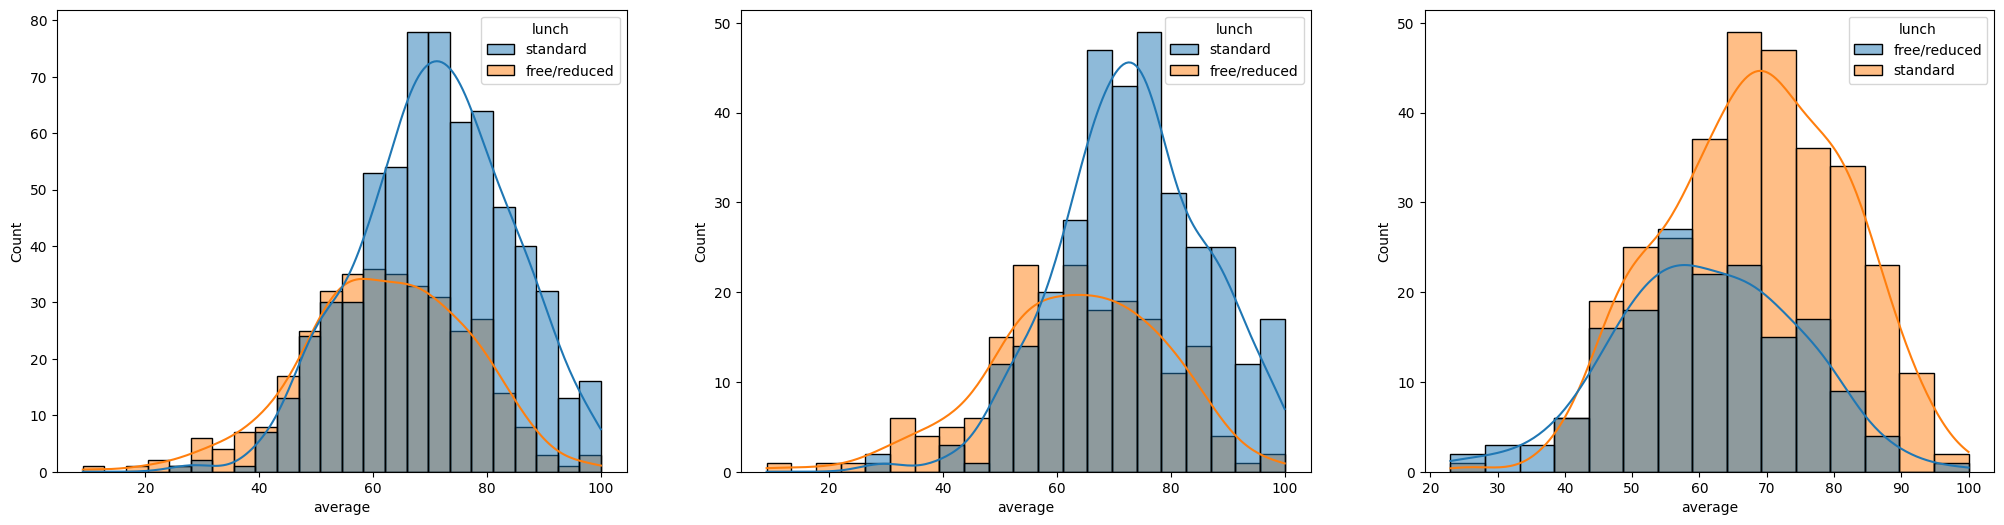

In [92]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

In [ ]:
pivot_table_b = pd.pivot_table(
    df,
    index='parental_level_of_education',
    values='average',
    aggfunc='mean',  # Counts occurrences
    fill_value=0     # Fill missing values with 0
)
pivot_table_b

,average
parental_level_of_education,
associate's degree,69.569069
bachelor's degree,71.923729
high school,63.096939
master's degree,73.598870
some college,68.476401
some high school,65.108007


###### Students with parents who have a masters' degree fare better than the others, yet there's no concrete pattern. Among the girls, students with parents who have a bachelor's degree fare the best and in the boys, Students with parents who have a masters' degree deliver the best performance.

In [96]:
pivot_table_c = pd.pivot_table(
    df,
    index='parental_level_of_education',
    columns='gender',
    values='average',
    aggfunc='mean',  # Counts occurrences
    fill_value=0     # Fill missing values with 0
)
pivot_table_c

gender,female,male
parental_level_of_education,,
associate's degree,71.123563,67.867925
bachelor's degree,74.671958,68.775758
high school,64.748227,61.575163
master's degree,73.648148,73.521739
some college,71.002825,65.716049
some high school,65.564103,64.636364


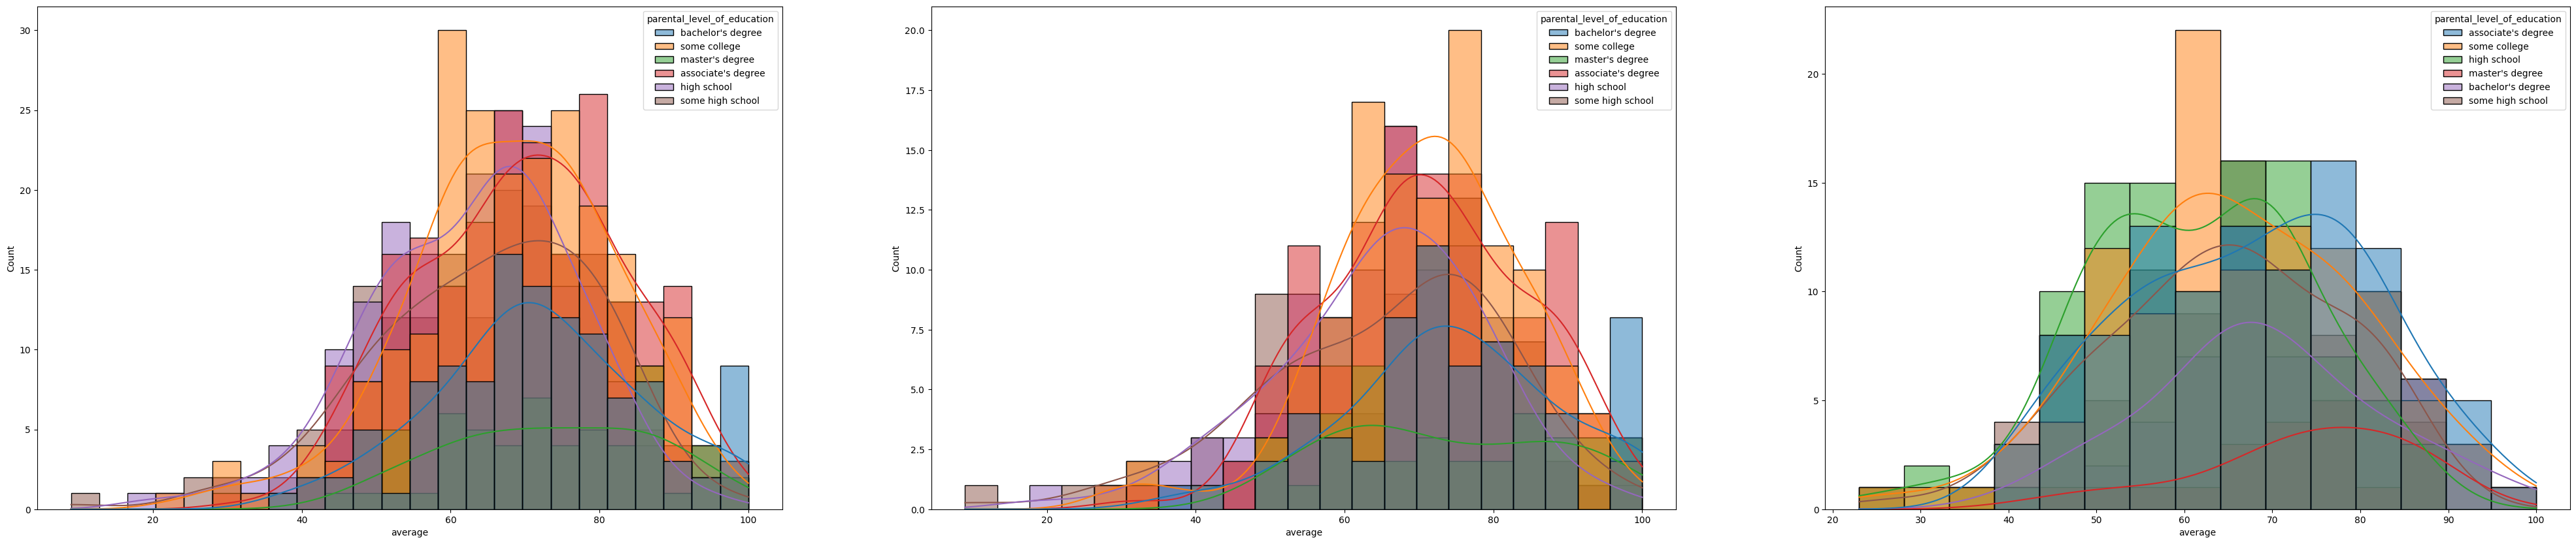

In [100]:
plt.subplots(1,3,figsize=(50,10))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

In [103]:
pivot_table_d = pd.pivot_table(
    df,
    index='race_ethnicity',
    values='average',
    aggfunc='mean',  # Counts occurrences
    fill_value=0     # Fill missing values with 0
)
pivot_table_d

,average
race_ethnicity,
group A,62.992509
group B,65.468421
group C,67.131661
group D,69.179389
group E,72.752381


In [105]:
pivot_table_e = pd.pivot_table(
    df,
    index='race_ethnicity',
    columns='gender',
    values='average',
    aggfunc='mean',  # Counts occurrences
    fill_value=0     # Fill missing values with 0
)
pivot_table_e

gender,female,male
race_ethnicity,,
group A,65.129630,61.540881
group B,67.509615,63.000000
group C,68.585185,65.249400
group D,71.439276,66.987469
group E,74.062802,71.478873


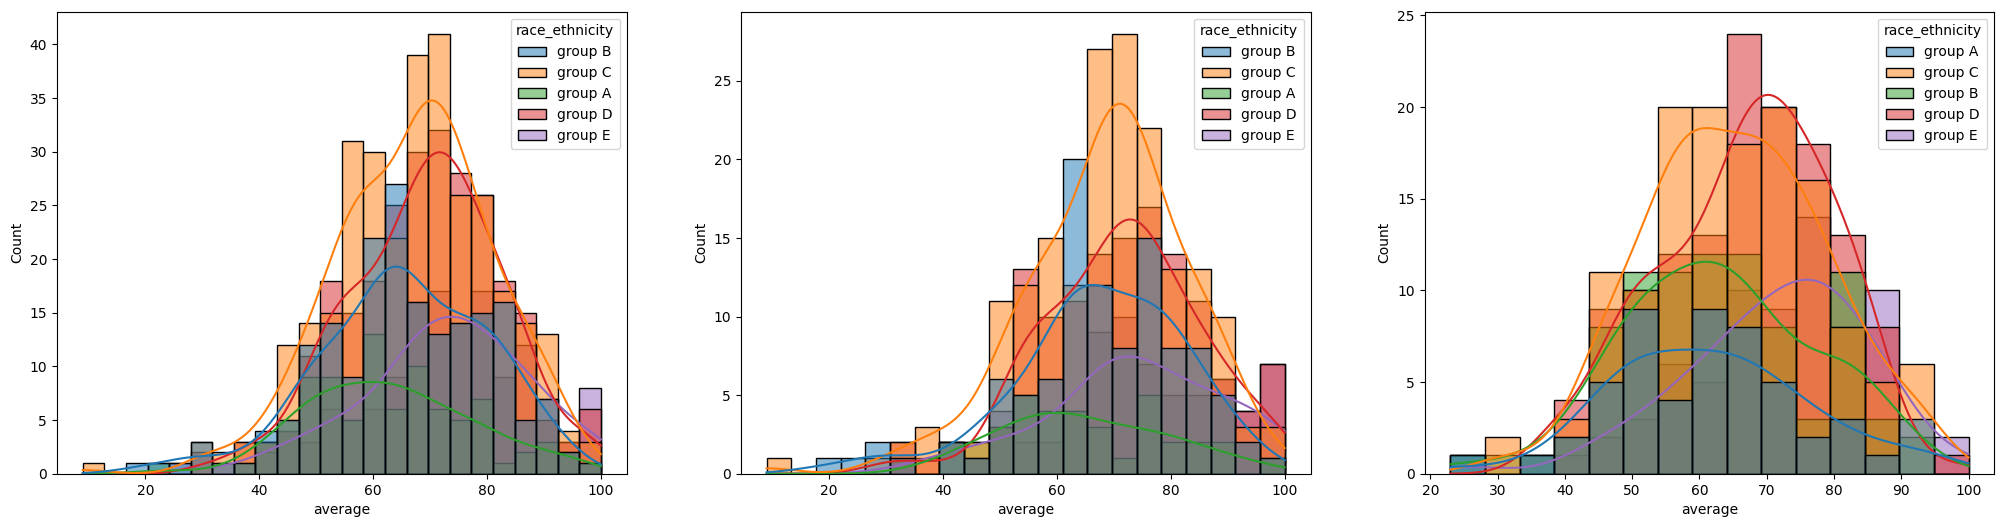

In [108]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

###### The boys and girls belonging to the race group E perform the best, according to this dataset.

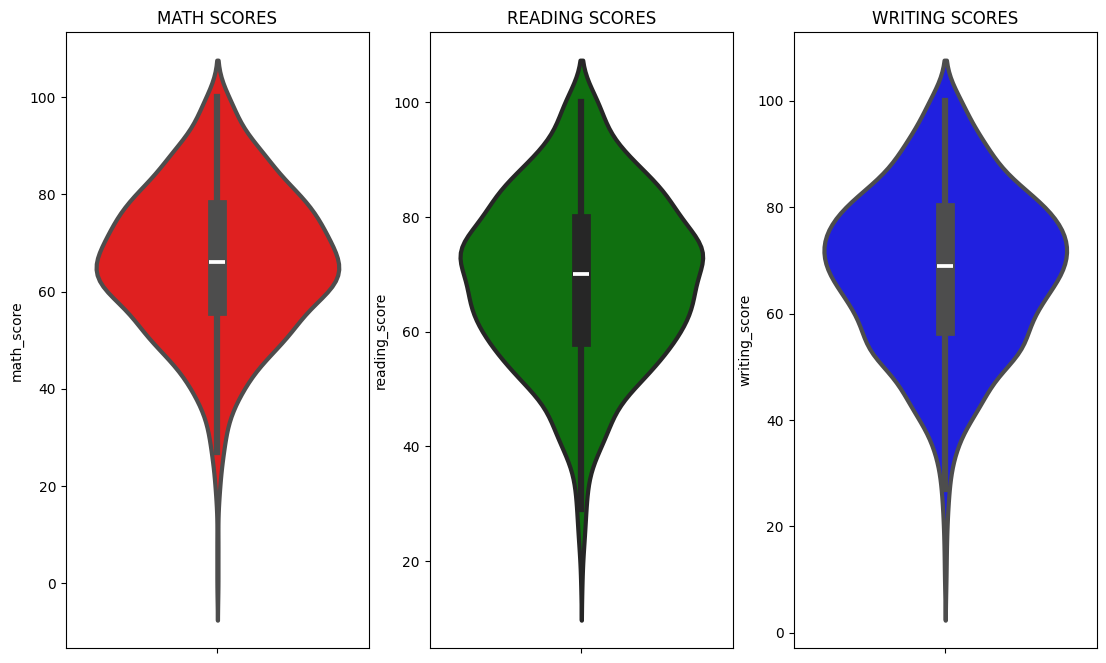

In [107]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

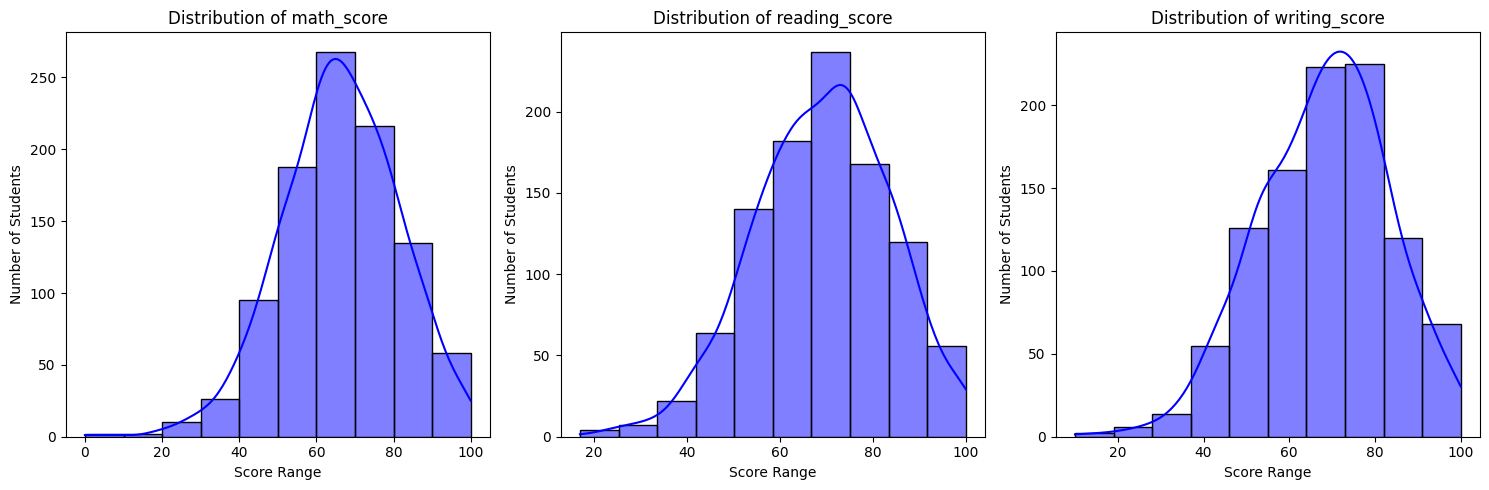

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of subjects
subjects = ['math_score', 'reading_score', 'writing_score']

# Create histograms for each subject
plt.figure(figsize=(15, 5))
for i, subject in enumerate(subjects, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[subject], bins=10, kde=True, color='blue')
    plt.title(f'Distribution of {subject}')
    plt.xlabel('Score Range')
    plt.ylabel('Number of Students')

# Show the plots
plt.tight_layout()
plt.show()


In [110]:
# Numerical Summary:
for subject in subjects:
    mode_range = pd.cut(df[subject], bins=10).value_counts().idxmax()
    print(f"Most students score in the range {mode_range} for {subject}.")


Most students score in the range (60.0, 70.0] for math_score.
Most students score in the range (66.8, 75.1] for reading_score.
Most students score in the range (64.0, 73.0] for writing_score.


In [111]:
for subject in subjects:
    value_counts = pd.cut(df[subject], bins=10).value_counts()
    mode_range = value_counts.idxmax()  # Range with the highest count
    mode_count = value_counts.max()    # Count of students in that range
    print(f"Most students score in the range {mode_range} for {subject}, with a count of {mode_count}.")

Most students score in the range (60.0, 70.0] for math_score, with a count of 270.
Most students score in the range (66.8, 75.1] for reading_score, with a count of 237.
Most students score in the range (64.0, 73.0] for writing_score, with a count of 229.


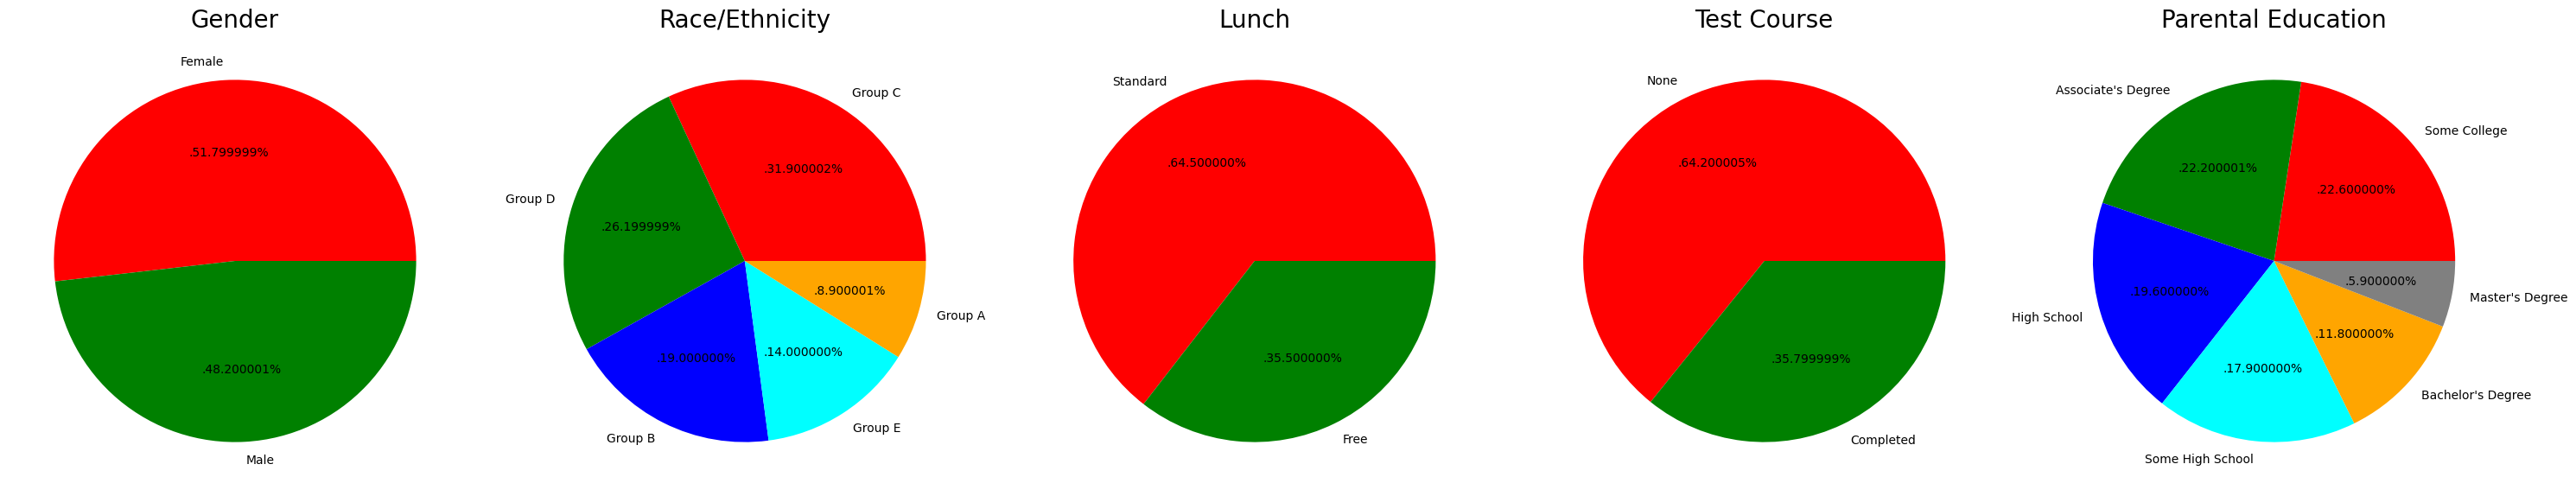

In [112]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

###### The ratio of boys to girls is almost 50:50
###### The students belonging to Group C constitute most of the school.
###### Students consuming standard lunch are greater in number than free lunches.
###### Students who have not enrolled in test prep are greater in number.
###### Number of students whose parental education is "Some College" is the largest followed closely by "Associate's Degree"

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average                      1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.3+ KB


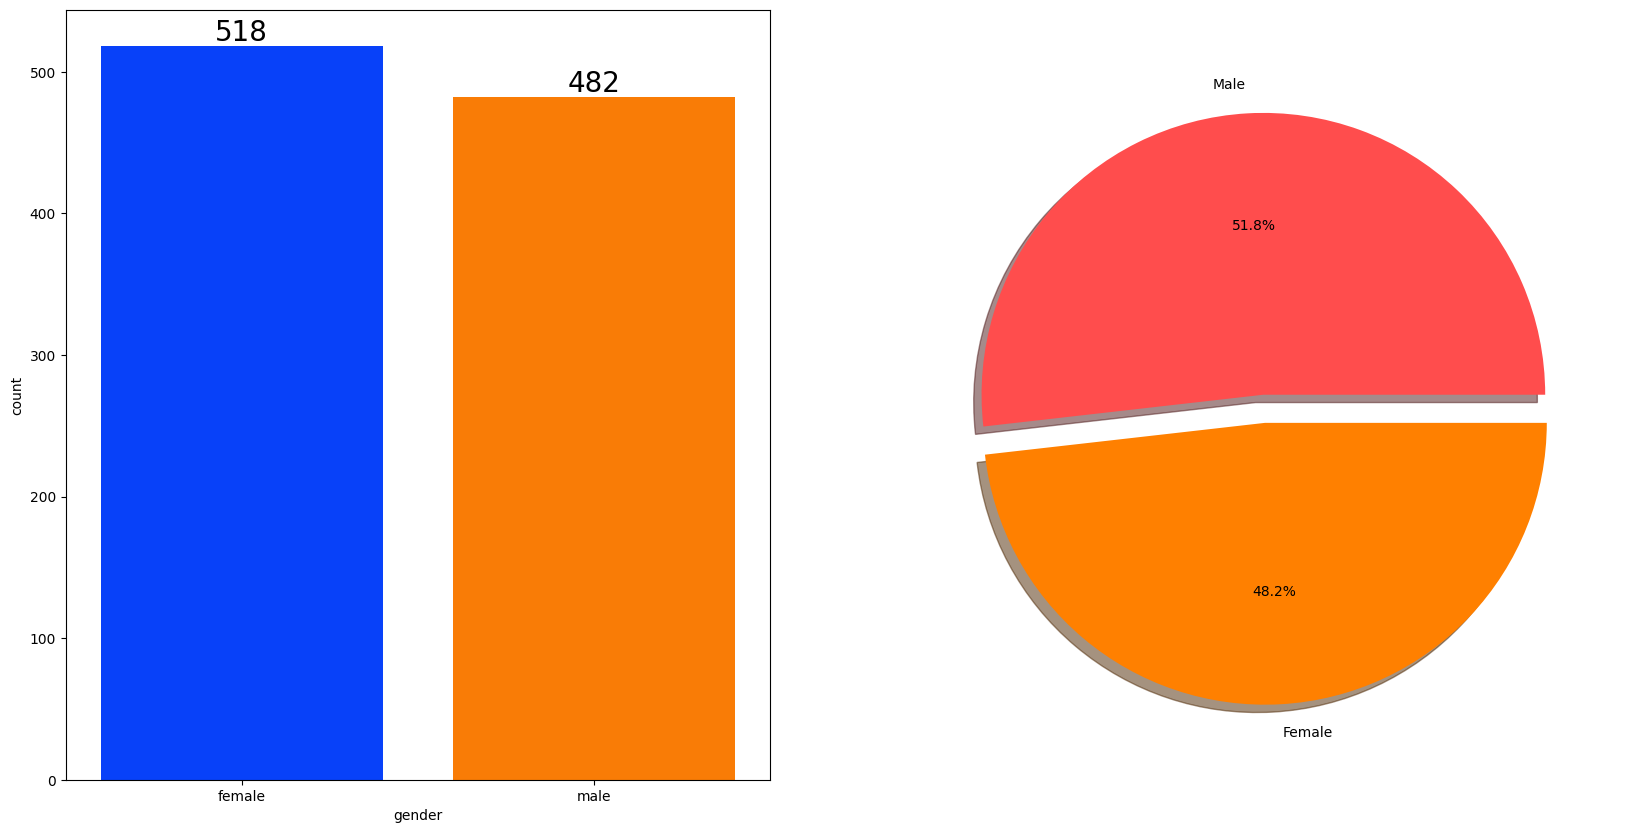

In [115]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

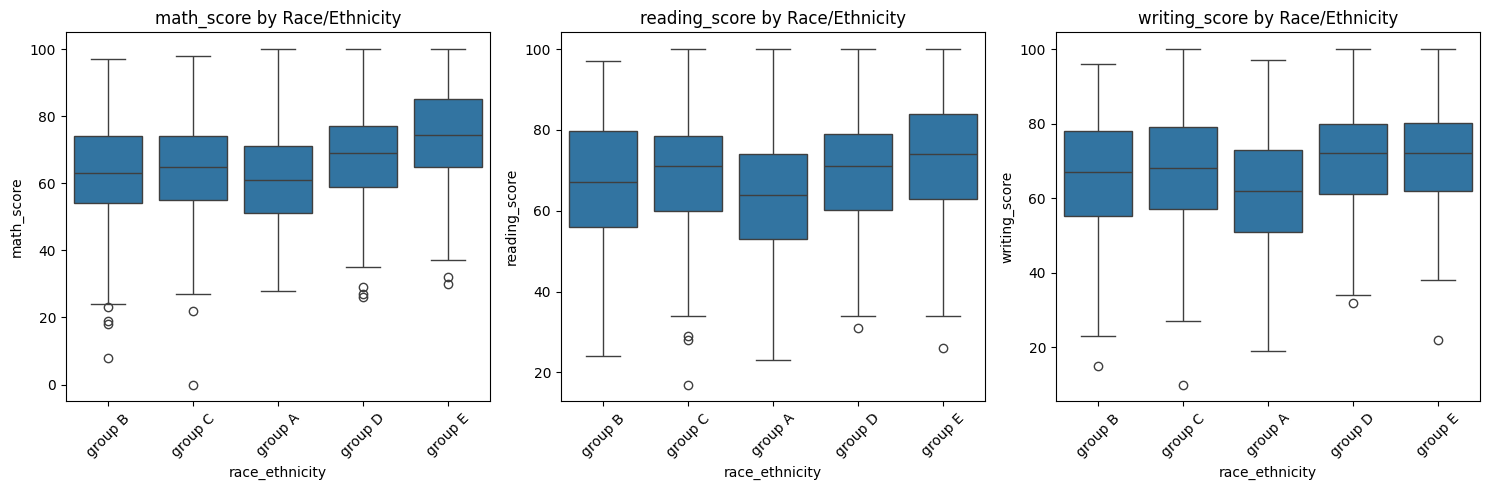

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['math_score', 'reading_score', 'writing_score']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='race_ethnicity', y=feature, data=df)
    plt.title(f'{feature} by Race/Ethnicity')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [118]:
from scipy.stats import f_oneway

# Perform ANOVA for each numerical feature
for feature in numerical_features:
    groups = [df[df['race_ethnicity'] == category][feature] for category in df['race_ethnicity'].unique()]
    stat, p_value = f_oneway(*groups)
    print(f"ANOVA for {feature}: F-statistic = {stat:.3f}, p-value = {p_value:.3e}")


ANOVA for math_score: F-statistic = 14.594, p-value = 1.373e-11
ANOVA for reading_score: F-statistic = 5.622, p-value = 1.780e-04
ANOVA for writing_score: F-statistic = 7.162, p-value = 1.098e-05


###### Since the p-value is very much less than 0.05, we can conclude that the *race_ethnicity* feature influences the numerical triad 

In [120]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for feature in numerical_features:
    tukey = pairwise_tukeyhsd(df[feature], df['race_ethnicity'])
    print(f"Tukey HSD for {feature}:\n{tukey}\n")


Tukey HSD for math_score:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
group A group B   1.8234 0.8724   -3.36  7.0068  False
group A group C   2.8347 0.4968 -2.0028  7.6723  False
group A group D   5.7334 0.0138  0.7824 10.6844   True
group A group E  12.1922    0.0  6.7215 17.6629   True
group B group C   1.0113 0.9452 -2.6867  4.7094  False
group B group D     3.91  0.044  0.0647  7.7552   True
group B group E  10.3688    0.0  5.8741 14.8635   True
group C group D   2.8986  0.129 -0.4659  6.2632  False
group C group E   9.3575    0.0  5.2665 13.4485   True
group D group E   6.4588 0.0003  2.2343 10.6834   True
------------------------------------------------------

Tukey HSD for reading_score:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
group A g

###### 
###### Reading Score:
###### Implication: Certain groups (e.g., group E) have significantly higher average math scores compared to others, while some groups (e.g., group A vs. group B) show no substantial difference.
###### Writing Score:
###### Group E stands out as consistently performing better, while group A tends to lag behind.
###### The significant differences revealed by Tukey's HSD test confirm that the race_ethnicity groups exhibit varying performance levels in the three subjects. Addressing these disparities requires a deeper understanding of underlying factors driving these results.

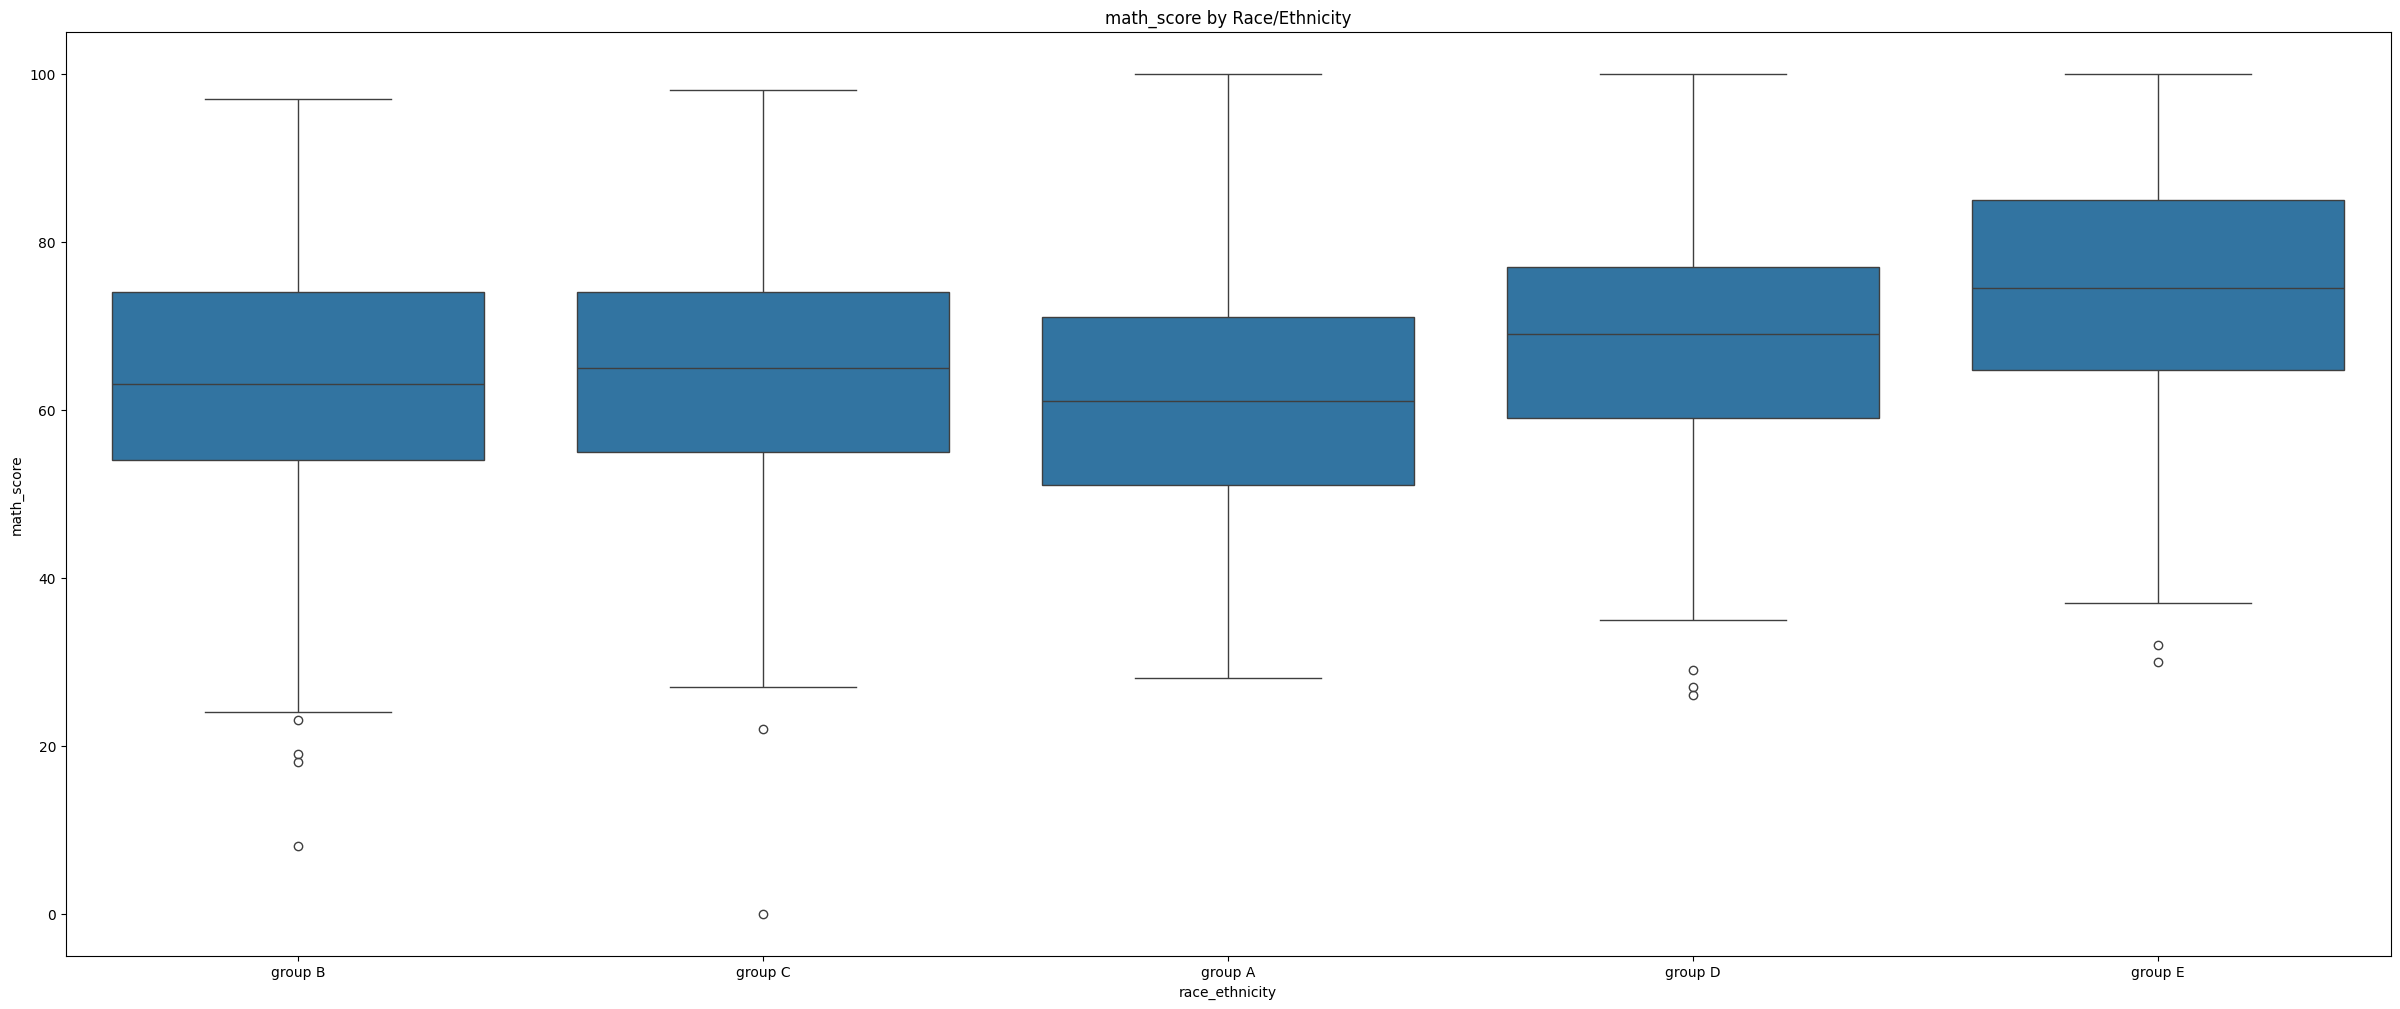

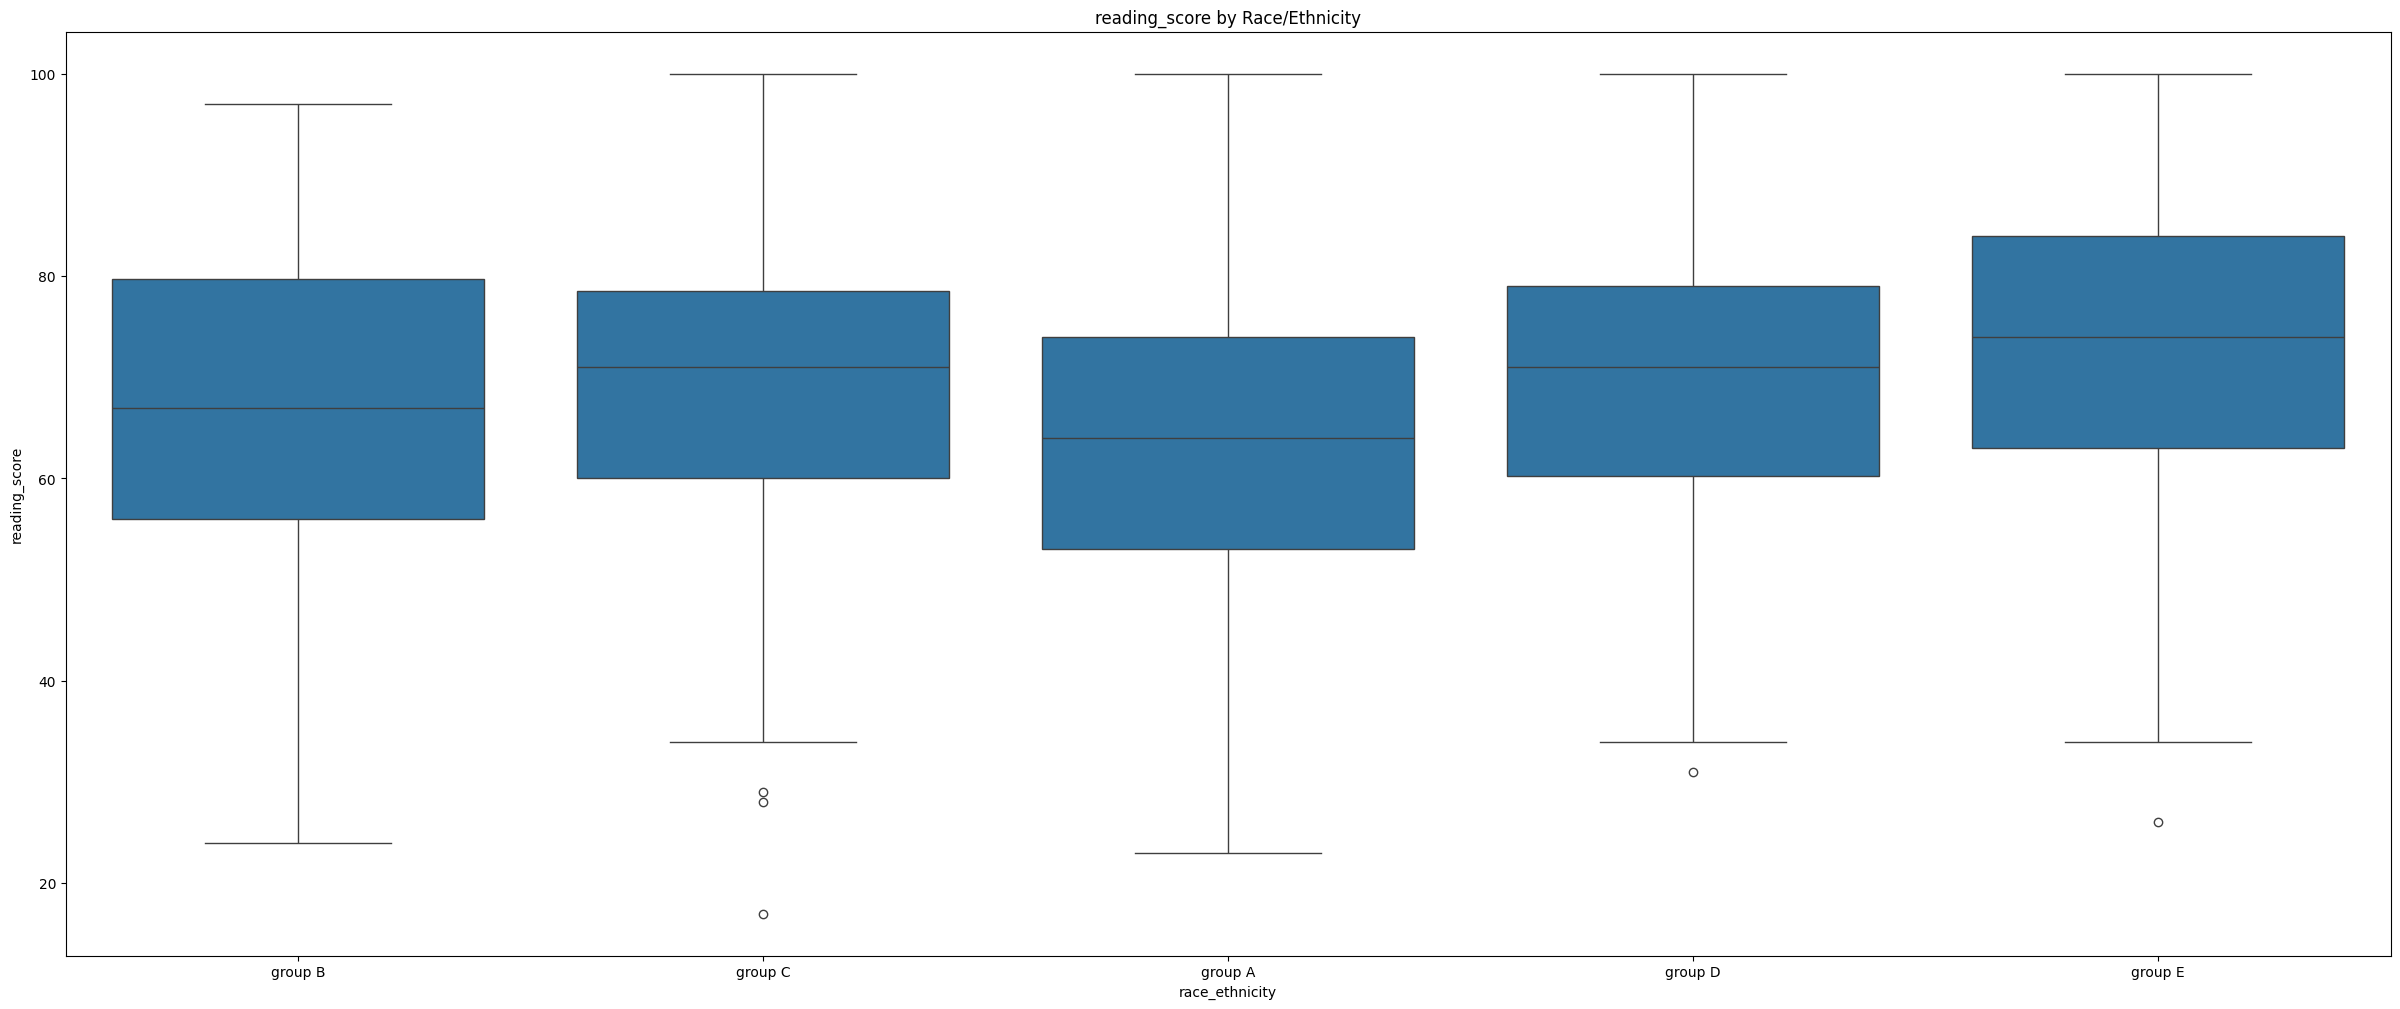

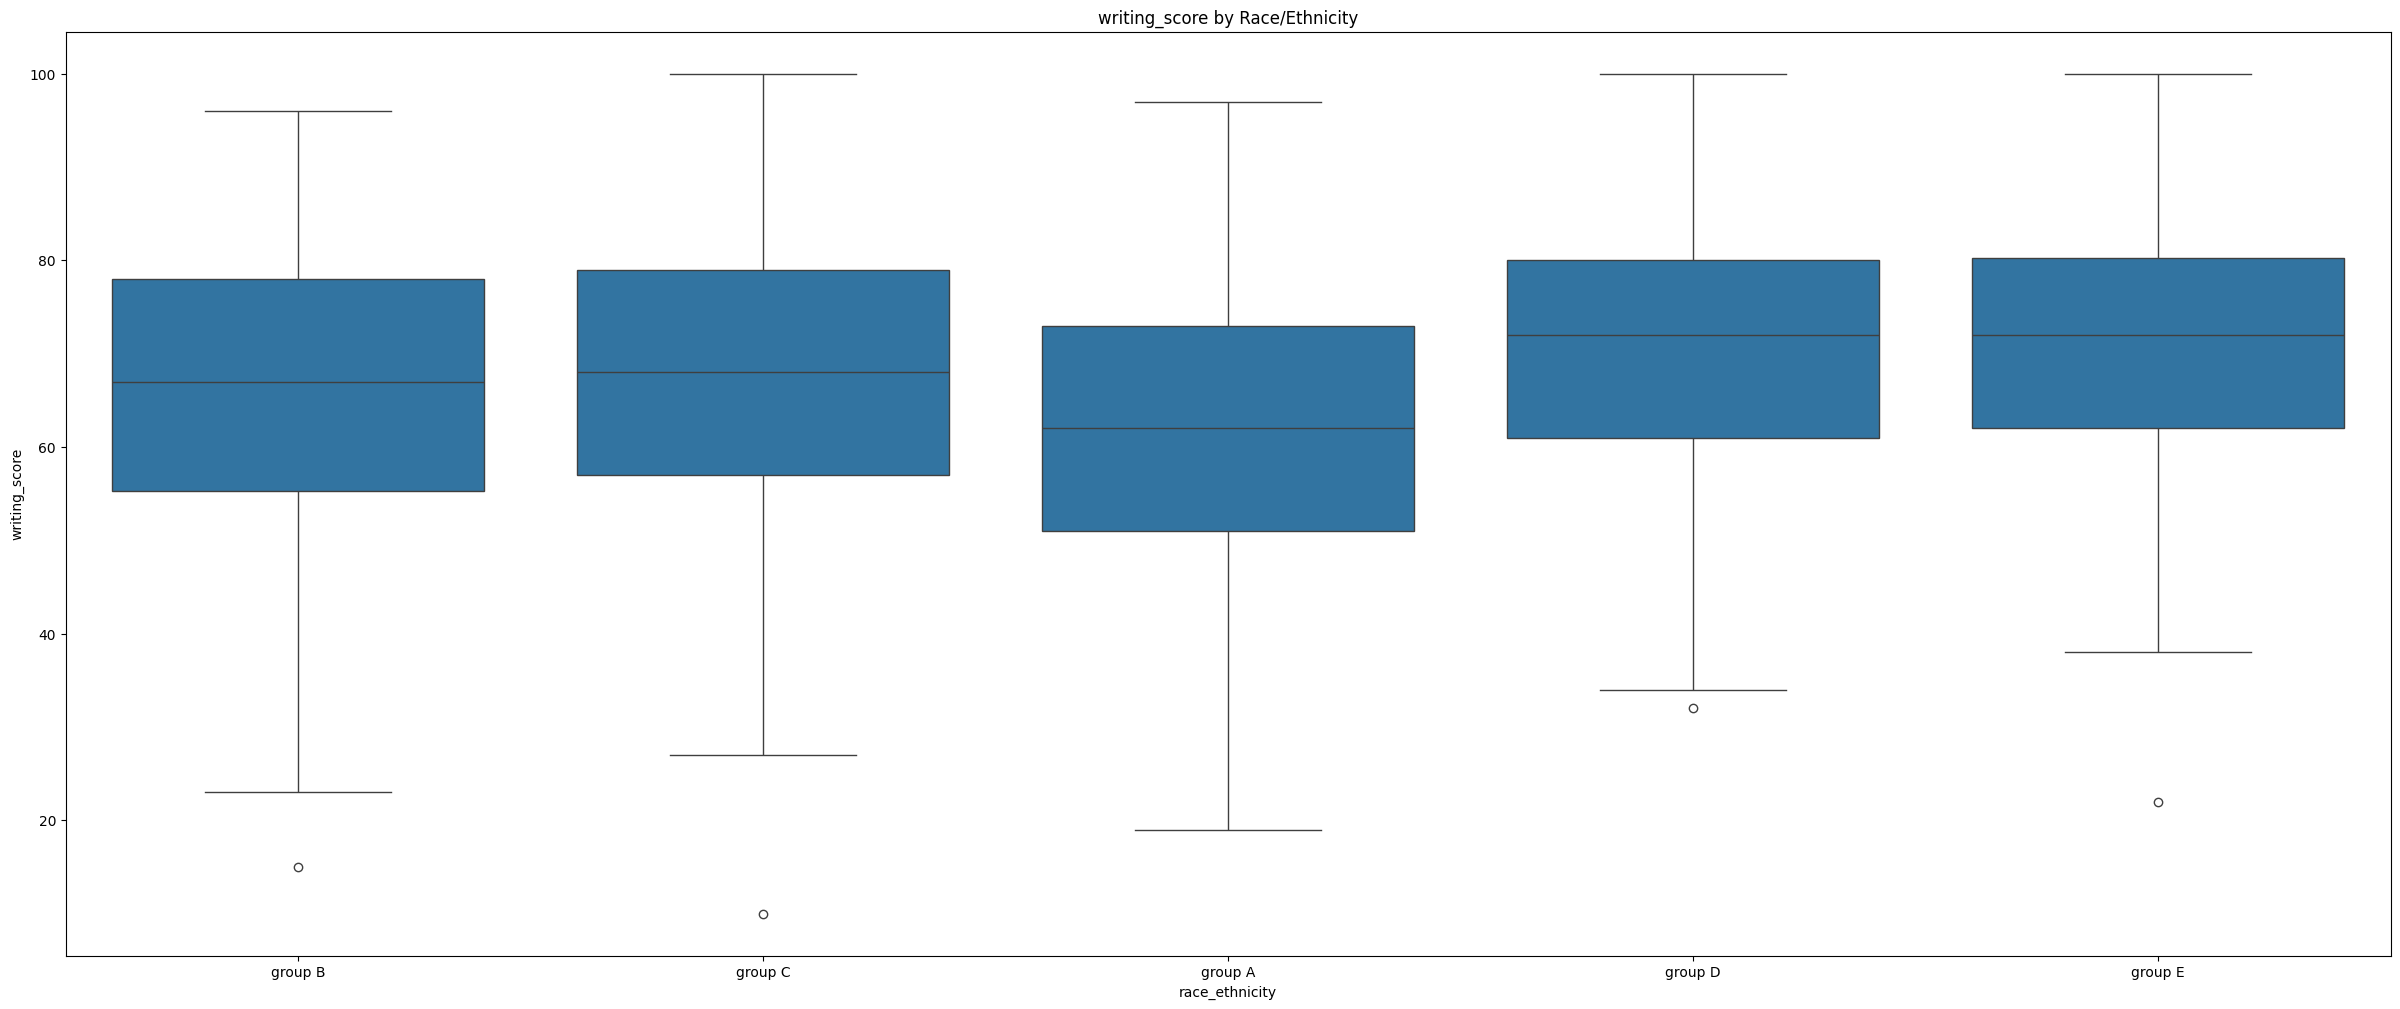

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

for subject in ['math_score', 'reading_score', 'writing_score']:
    sns.boxplot(data=df, x='race_ethnicity', y=subject)
    plt.title(f'{subject} by Race/Ethnicity')
    plt.show()


###### Parental level of education:

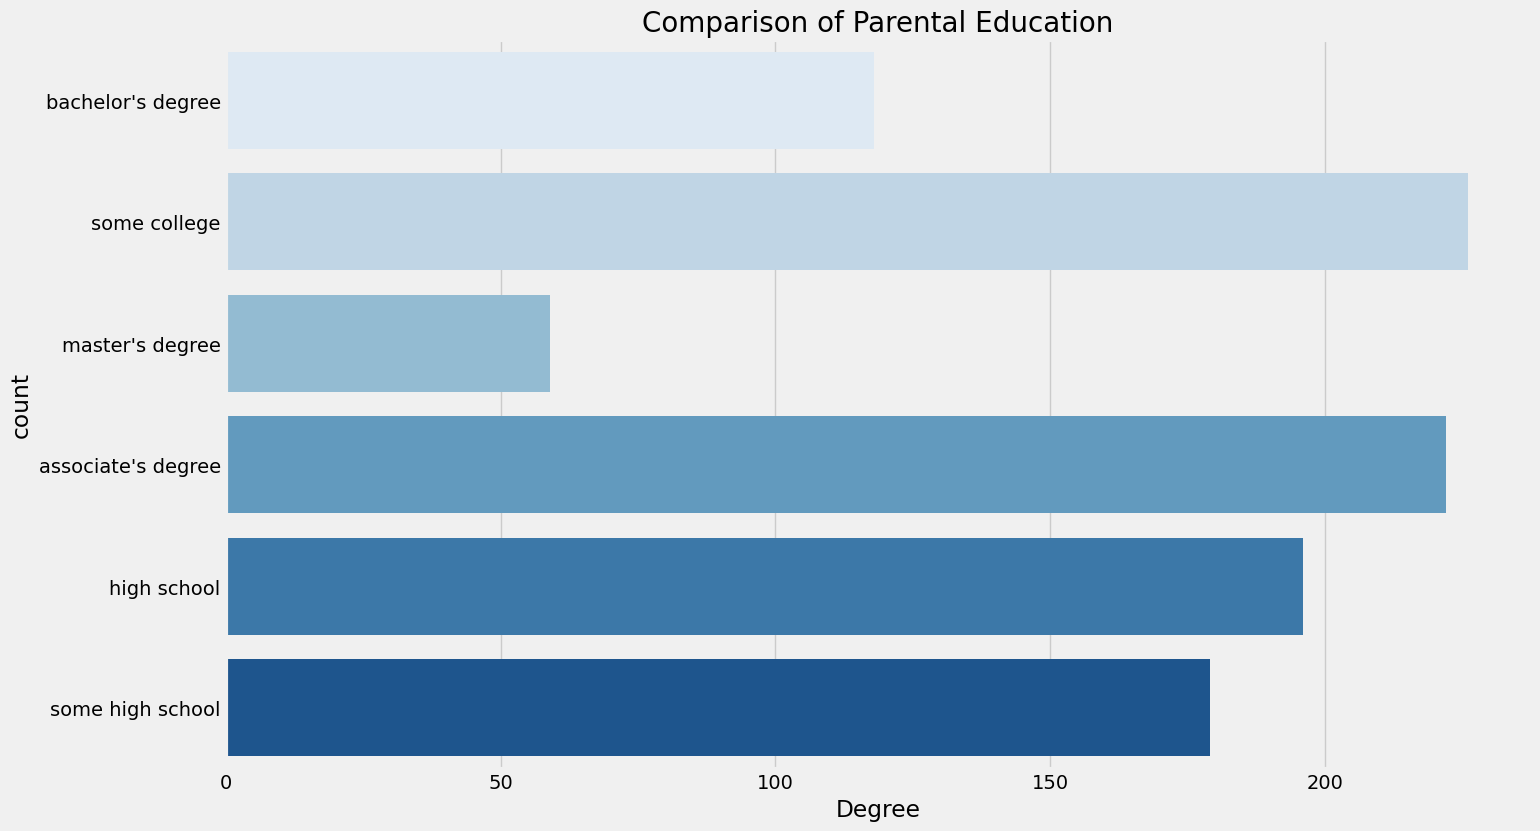

In [123]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

##### Most of the parents are from *some college*

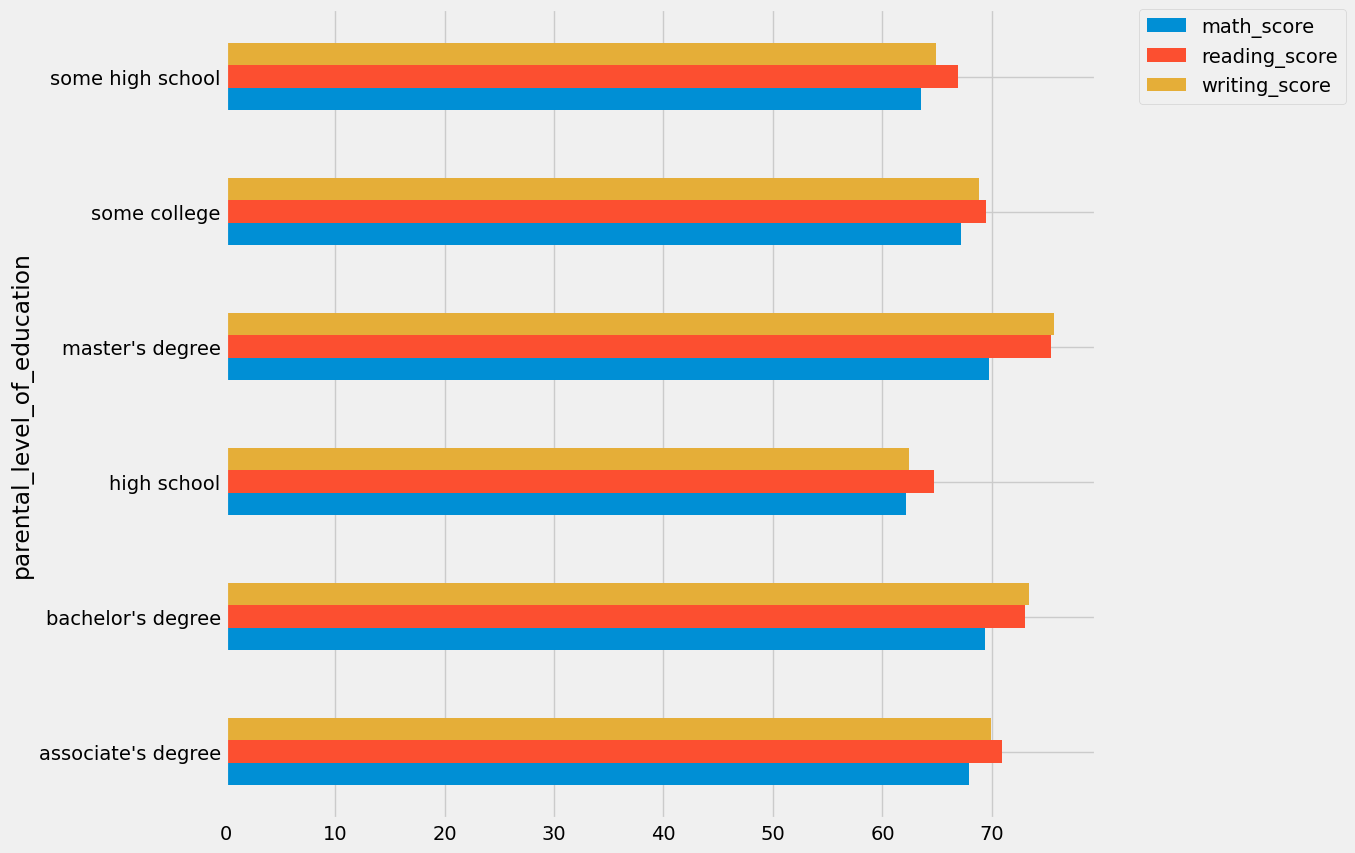

In [130]:
df.groupby('parental_level_of_education')[numerical_col].agg('mean').plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

###### Students with parents who have graduated with a master's degree perform better than anyone else.

##### 4.4.4 LUNCH COLUMN
###### Which type of lunch is most common amoung students ?
###### What is the effect of lunch type on test results?

##### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

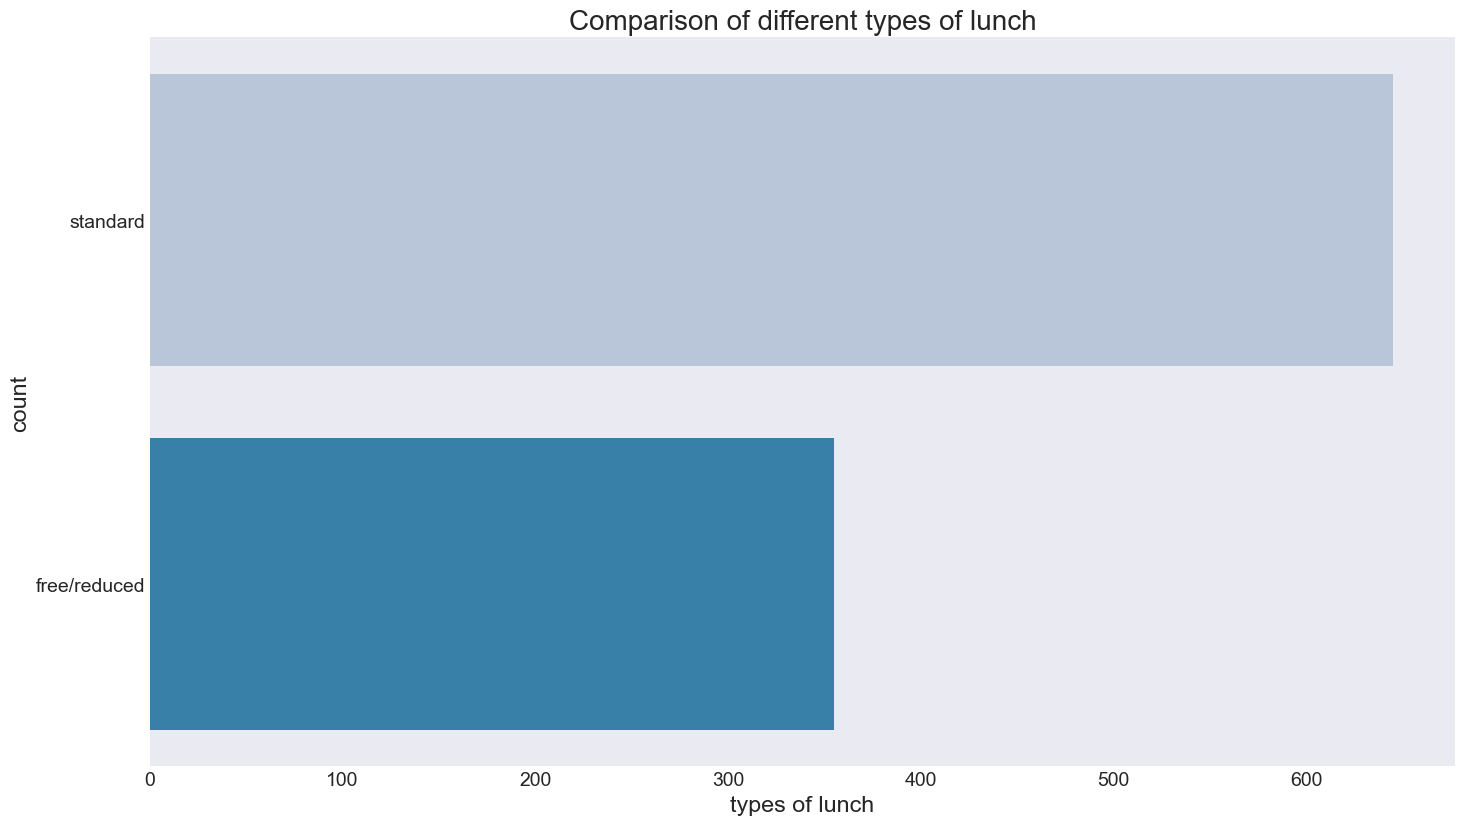

In [134]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-dark')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

##### The number of students being served with standard lunch is higher.

##### 4.4.5 TEST PREPARATION COURSE COLUMN
###### Which type of lunch is most common amoung students ?
###### Is Test prepration course has any impact on student's performance ?

##### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

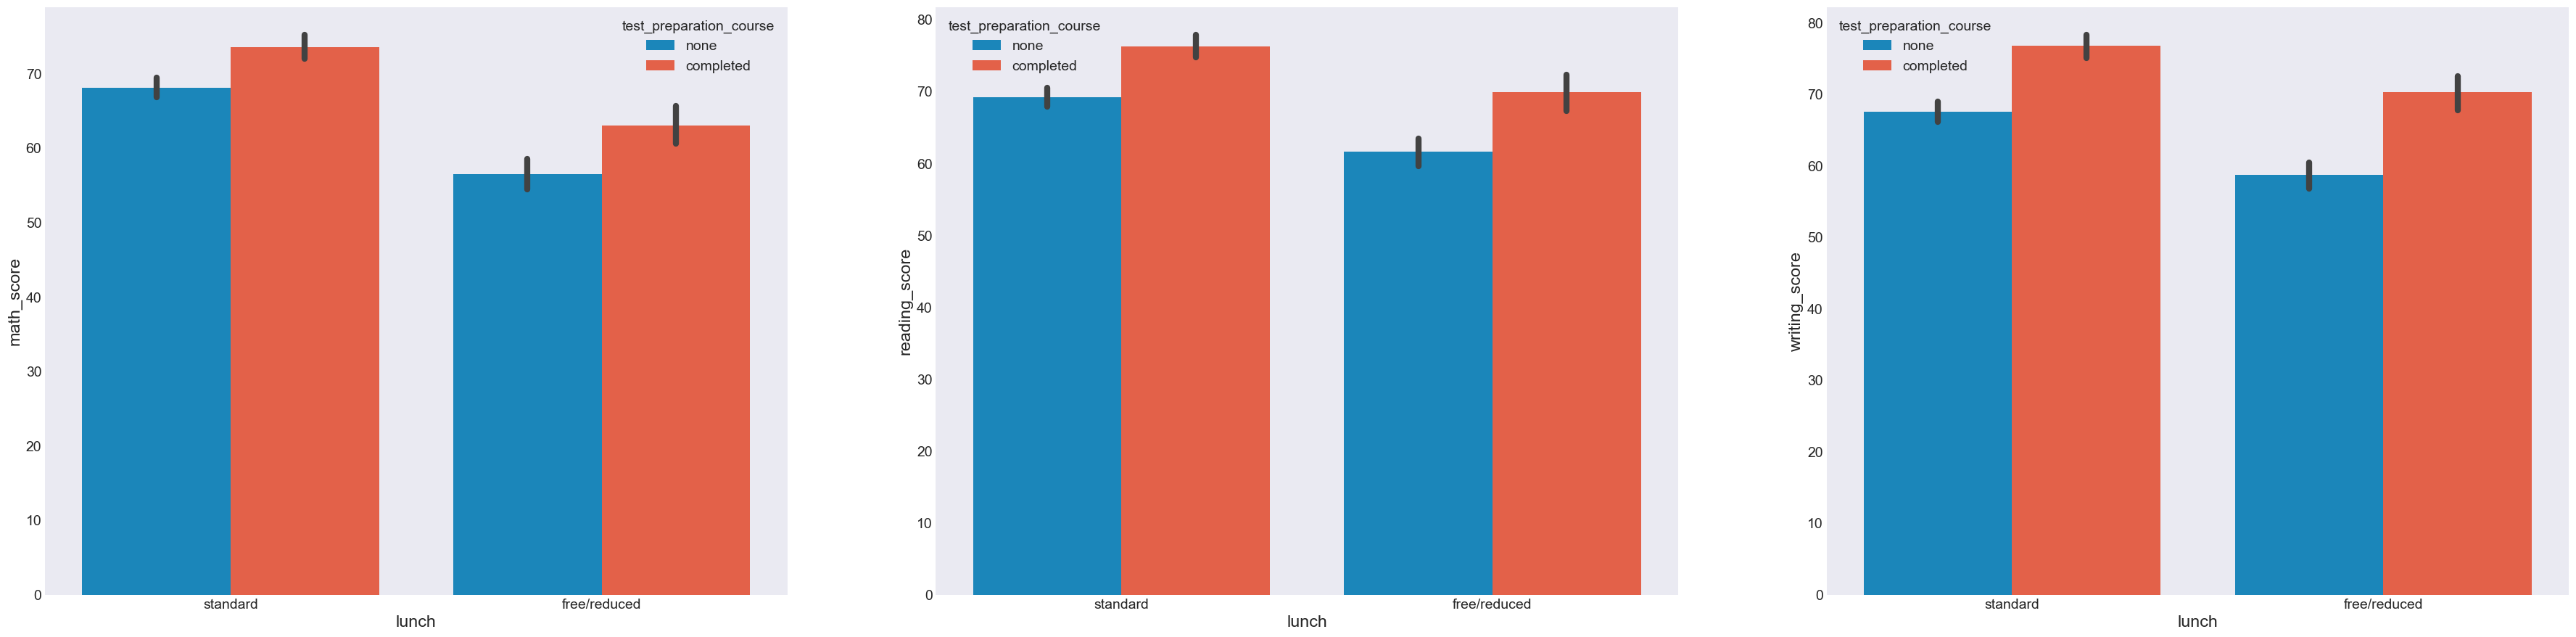

In [141]:
plt.figure(figsize=(40,10))
plt.subplot(1,3,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(1,3,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(1,3,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

###### Students who have completed the test preparation course have scored higher in all the three categories.

##### Students who have scored higher

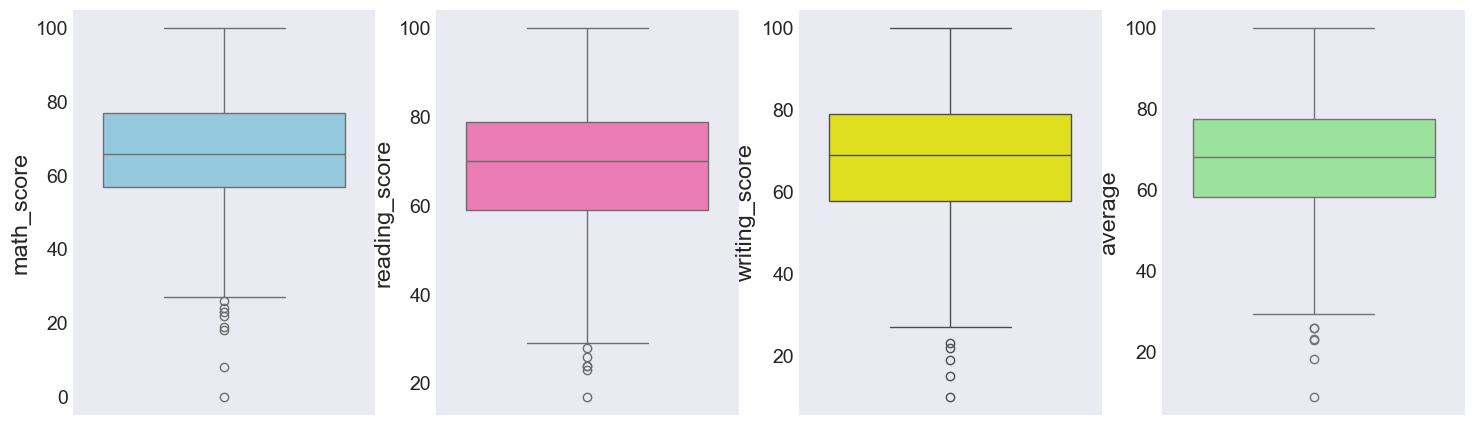

In [143]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

##### Multivariate analysis using pairplot

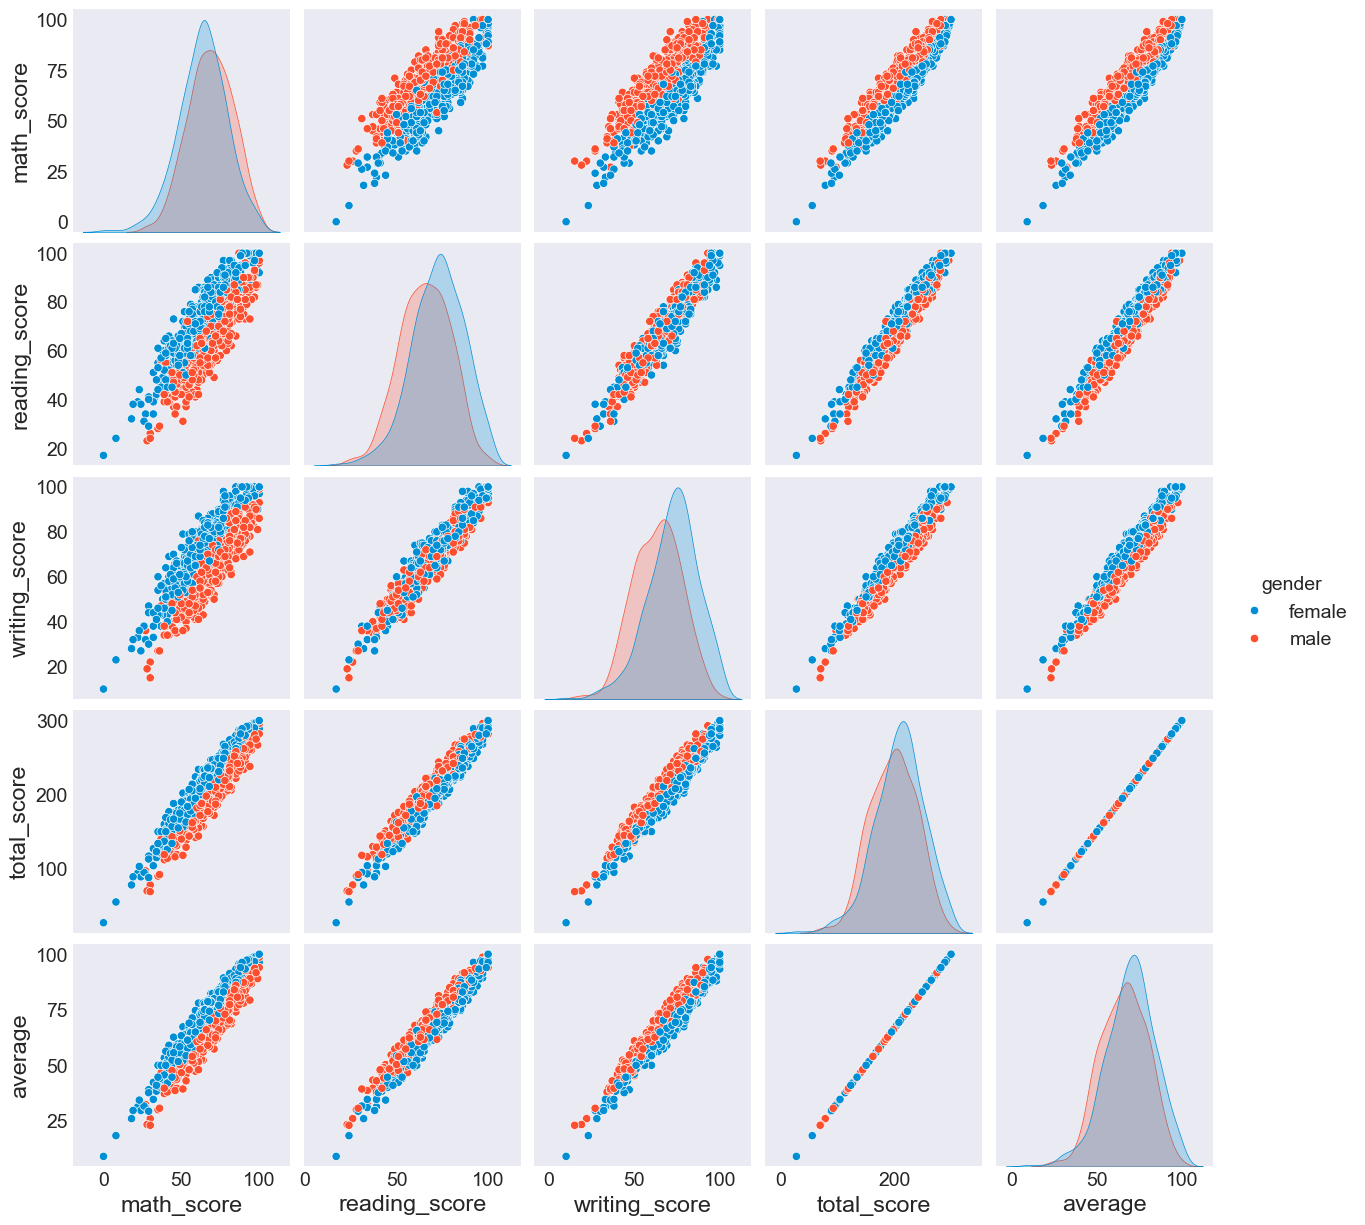

In [144]:
sns.pairplot(df,hue = 'gender')
plt.show()

##### 5. Conclusions
###### Student's Performance is related with lunch, race, parental level education
###### Females lead in pass percentage and also are top-scorers
###### Student's Performance is not much related with test preparation course
###### Finishing preparation course is benefitial.